# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [4]:
estimators = [ ('hc_ward' , AgglomerativeClustering(n_clusters = 3, linkage = 'ward')), 
                     ('hc_complete', AgglomerativeClustering(n_clusters = 3, linkage = 'complete')),
                     ('hc_average', AgglomerativeClustering(n_clusters = 3, linkage = 'average'))]

titles = ['ward', 'complete', 'average']

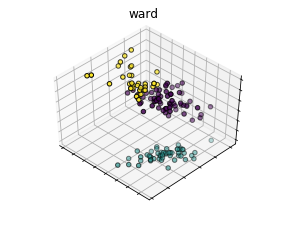

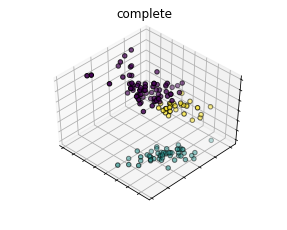

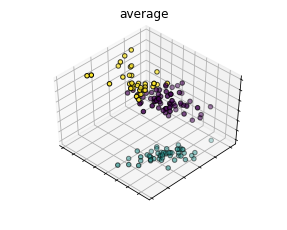

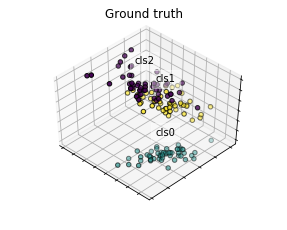

In [5]:
fignum = 1
for name, est in estimators:
    fig = plt.figure(fignum, figsize = (4,3))
    ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)
    
    est.fit(x)
    labels = est.labels_
    
    ax.scatter(x[:,0], x[:,1], x[:,2], c = labels.astype(np.float), edgecolor = 'k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum += 1

#plot the ground truth
fig = plt.figure(fignum, figsize = (4,3))
ax = Axes3D(fig, rect = [0,0,0.95,1], elev = 48, azim = 134)

for name, label in [ ('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(x[y==label, 0].mean(),
                  x[y==label, 1].mean(),
                  x[y==label, 2].mean()+2 , name, horizontalalignment = 'center',
                  bbox = dict(alpha = 0.4, edgecolor = 'w', facecolor = 'w'))

y = np.choose(y, [1,2,0]).astype(float)
ax.scatter(x[:,0], x[:,1], x[:,2], c = y, edgecolor ='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground truth')
ax.dist = 12